In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv(r"C:\Users\NANDHITHA\Desktop\train.csv", encoding='ISO-8859-1') 
test = pd.read_csv(r"C:\Users\NANDHITHA\Desktop\test.csv",encoding='ISO-8859-1') 
meal = pd.read_csv(r"C:\Users\NANDHITHA\Desktop\meal.csv")
center = pd.read_csv(r"C:\Users\NANDHITHA\Desktop\center.csv")

In [4]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [50]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [52]:
train['num_orders'].describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

In [53]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [54]:
meal_info= pd.read_csv(r"C:\Users\NANDHITHA\Desktop\meal.csv",encoding='ISO-8859-1') 
center_info= pd.read_csv(r"C:\Users\NANDHITHA\Desktop\center.csv",encoding='ISO-8859-1')

In [55]:
trainfinal = pd.merge(train, meal_info, on="meal_id", how="outer")
trainfinal = pd.merge(trainfinal, center_info, on="center_id", how="outer")
trainfinal.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [56]:
trainfinal = trainfinal.drop(['center_id', 'meal_id'], axis=1)
trainfinal.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [57]:
cols = trainfinal.columns.tolist()
print(cols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


In [58]:
cols = cols[:2] + cols[9:] + cols[7:9] + cols[2:7]
print(cols)

['id', 'week', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


In [59]:
trainfinal = trainfinal[cols]
trainfinal.dtypes

id                         int64
week                       int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
lb1 = LabelEncoder()
trainfinal['center_type'] = lb1.fit_transform(trainfinal['center_type'])
lb2 = LabelEncoder()
trainfinal['category'] = lb1.fit_transform(trainfinal['category'])
lb3 = LabelEncoder()
trainfinal['cuisine'] = lb1.fit_transform(trainfinal['cuisine'])

In [62]:
trainfinal.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,647,56,2,2.0,0,3,136.83,152.29,0,0,177
1,1018704,2,647,56,2,2.0,0,3,135.83,152.29,0,0,323
2,1196273,3,647,56,2,2.0,0,3,132.92,133.92,0,0,96
3,1116527,4,647,56,2,2.0,0,3,135.86,134.86,0,0,163
4,1343872,5,647,56,2,2.0,0,3,146.50,147.50,0,0,215


In [63]:
trainfinal. shape

(456548, 13)

C:\Users\NANDHITHA\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'num_orders Distribution')

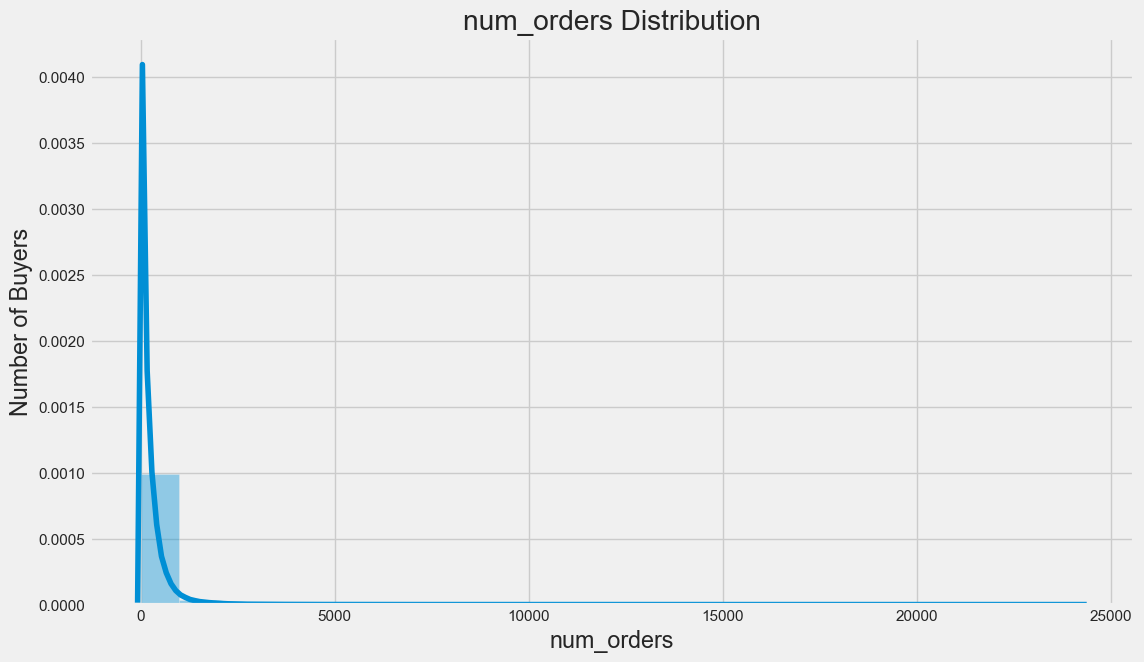

In [64]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(trainfinal.num_orders, bins = 25)
plt.xlabel("num_orders")
plt.ylabel("Number of Buyers")
plt.title("num_orders Distribution")

In [65]:
trainfinal2 = trainfinal.drop(['id'], axis=1)
correlation = trainfinal2.corr(method='pearson')
columns = correlation.nlargest (8, 'num_orders').index
columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category'],
      dtype='object')

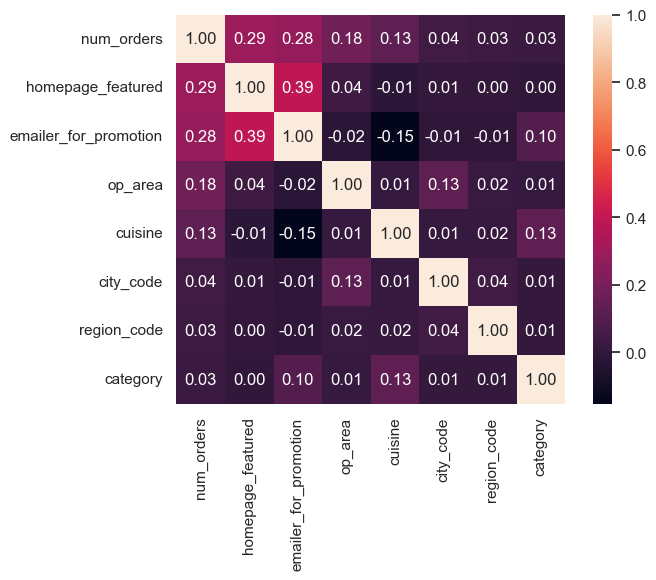

In [66]:
correlation_map = np.corrcoef(trainfinal2[columns].values.T) 
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f',
yticklabels=columns.values, xticklabels=columns.values)
plt.show()

In [67]:
features = columns.drop(['num_orders']) 
trainfinal3 = trainfinal[features]
X = trainfinal3.values
y = trainfinal[ 'num_orders'].values

In [68]:
trainfinal3.head()

,homepage_featured,emailer_for_promotion,op_area,cuisine,city_code,region_code,category
0,0,0,2.0,3,647,56,0
1,0,0,2.0,3,647,56,0
2,0,0,2.0,3,647,56,0
3,0,0,2.0,3,647,56,0
4,0,0,2.0,3,647,56,0


In [69]:
from sklearn.model_selection import train_test_split 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

In [71]:
import xgboost

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [73]:
XG = XGBRegressor() 
XG.fit(X_train, y_train)
y_pred = XG.predict(X_val) 
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 69.7963375209782


In [74]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_val) 
y_pred [y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 129.6496136869348


In [75]:
L = Lasso()
L.fit(X_train, y_train)
y_pred = L.predict(X_val)
y_pred [y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 129.09657389219592


In [76]:
EN = ElasticNet()
EN.fit(X_train, y_train)
y_pred = EN.predict(X_val)
y_pred [y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 130.91097477266663


In [77]:
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 63.01155858011851


In [78]:
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 67.67156711731828


In [79]:
GB = GradientBoostingRegressor()
GB.fit(X_train, y_train)
y_pred = GB.predict(X_val)
y_pred [y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 96.25568595866505


In [80]:
import pickle
pickle.dump(DT,open('fdemand.pkl', 'wb'))

In [81]:
testfinal = pd.merge(test, meal_info, on="meal_id", how="outer") 
testfinal = pd.merge(testfinal, center_info, on="center_id", how="outer")
testfinal = testfinal.drop(['meal_id', 'center_id'], axis=1)
tcols = testfinal.columns.tolist()
tcols = tcols[:2] + tcols[8:] + tcols[6:8] + tcols[2:6]
testfinal = testfinal[tcols]
lb1 = LabelEncoder() 
testfinal['center_type'] = lb1.fit_transform(testfinal[ 'center_type'])
lb2 = LabelEncoder()
testfinal[ 'category'] = lb1.fit_transform(testfinal[ 'category'])
lb3 = LabelEncoder() 
testfinal[ 'cuisine'] = lb1.fit_transform(testfinal[ 'cuisine'])
X_test = testfinal[features].values

In [82]:
pred = DT.predict(X_test)
pred[pred<0] = 0
submit = pd.DataFrame({
'id': testfinal['id'],
'num_orders' : pred
})

In [83]:
submit.to_csv("submission.csv", index=False)
submit.describe()

,id,num_orders
count,3.257300e+04,32573.000000
mean,1.248476e+06,262.849926
std,1.441580e+05,362.892064
min,1.000085e+06,14.781250
25%,1.123969e+06,64.302752
50%,1.247296e+06,148.370370
75%,1.372971e+06,319.984375
max,1.499996e+06,5146.529412
